<a href="https://colab.research.google.com/github/AniSuxita/fittech-data-analysis/blob/main/FitTech_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ზოგადი შედეგები

In [ ]:
import pandas as pd

file_path = '/content/my_data/fittech_data.csv'
df = pd.read_csv(file_path)
df.head()

,თარიღი,მომხმარებლის ID,ვარჯიშის ტიპი,ხანგრძლივობა,დამწვარი კალორიები,მომხმარებლის შეფასება
0,2023-10-15,1,იოგა,87.210753,453.472710,3
1,2023-09-11,1,იოგა,84.654772,460.105508,2
2,2023-05-12,1,იოგა,61.021877,322.364008,3
3,2023-07-11,1,იოგა,74.406264,351.477087,3
4,2023-03-01,1,ველოსიპედი,45.973848,220.272766,4


In [ ]:
user_count = df['მომხმარებლის ID'].nunique()
session_count = len(df)
mean = df['მომხმარებლის ID'].value_counts().mean()

print('მომხმარებლების რაოდენობაა: ',user_count)
print('სესიების რაოდენობა: ',session_count)
print('საშუალო სესიების რაოდენობა: ',mean)

მომხმარებლების რაოდენობაა:  10000
სესიების რაოდენობა:  477481
საშუალო სესიების რაოდენობა:  47.7481


მომხმარებლების რაოდენობა ბევრად აღემატება სესიების რაოდენობას, რაც გვიჩვენებს რომ თითო მომხმარებელი რამდენჯერმე ვარჯიშობდა აპლიკაციის გამოყენებით.

# ვარჯიშის ყველაზე პოპულარული სახეობა

In [ ]:
workout_performance = df.groupby('ვარჯიშის ტიპი').agg(
    Sessions=('თარიღი', 'count'),
    Total_Duration=('ხანგრძლივობა', 'sum'),
    Average_Duration=('ხანგრძლივობა', 'mean'),
    Total_Calories=('დამწვარი კალორიები', 'sum')
).reset_index()

workout_performance.columns = ['ვარჯიშის ტიპი', 'სესიები', 'ჯამური ხანგრძლივობა', 'საშუალო ხანგრძლივობა', 'ჯამური კალორიები']

workout_performance['კალორიები თითო სესიაზე'] = workout_performance['ჯამური კალორიები'] / workout_performance['სესიები']

workout_performance = workout_performance.sort_values(by='სესიები', ascending=False)

print(workout_performance)

  ვარჯიშის ტიპი  სესიები  ჯამური ხანგრძლივობა  საშუალო ხანგრძლივობა  \
2       სირბილი   167259         6.271859e+06             37.497889   
1          იოგა    95823         6.469055e+06             67.510458   
0    ველოსიპედი    95422         3.572990e+06             37.444090   
3         ცურვა    71096         2.663908e+06             37.469173   
4     ძალოსნობა    47881         1.796588e+06             37.521945   

   ჯამური კალორიები  კალორიები თითო სესიაზე  
2      4.704373e+07              281.262747  
1      3.234402e+07              337.539190  
0      1.787051e+07              187.278768  
3      1.330985e+07              187.209537  
4      1.077242e+07              224.983084  


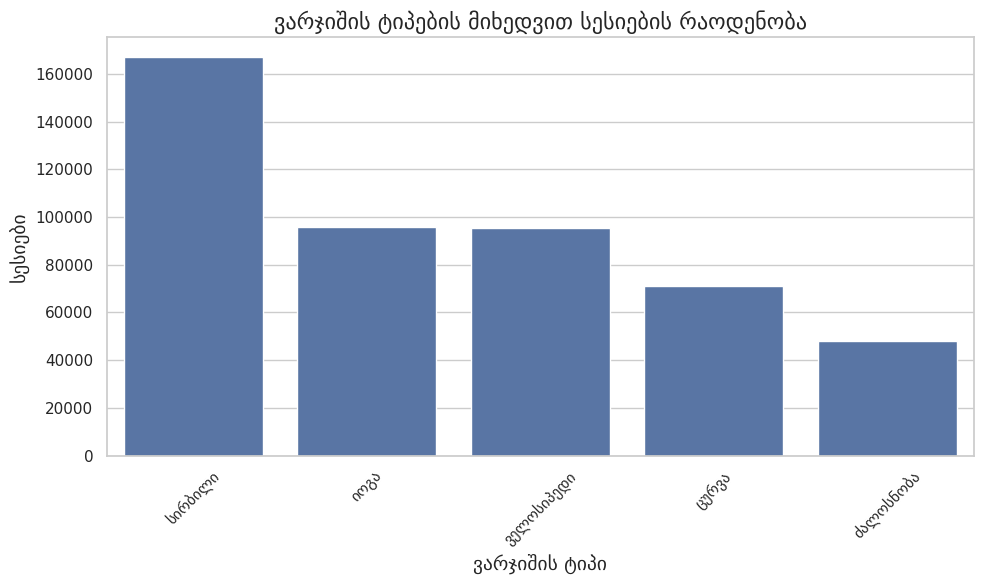

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='ვარჯიშის ტიპი', y='სესიები', data=workout_performance)

plt.title('ვარჯიშის ტიპების მიხედვით სესიების რაოდენობა', fontsize=16)
plt.xlabel('ვარჯიშის ტიპი', fontsize=14)
plt.ylabel('სესიები', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**მიგნება**

ცხრილიდან გამომდინარე ვარჯიშის ყველაზე პოპულარული ტიპია **სირბილი**:


1.   აქვს სესიების ყველაზე მეტი რაოდენობა
2.   ყველაზე ნაკლებ დროში ყველაზე მეტ კაორიას წვავს
3. არ მოითხოვს დამატებით უნარს ან ეკიპირებას

ყველაზე ხანგრძლივი სესიები **იოგას** ჰქონდა.


**რეკომენდაცია**

*   გამოიკვლიოს როგორ შეიძლება მომხმარებლის ჩართულობა სხვა სპორტების მიმართაც. მაგალითად, შესაძლოა გამოწვევების სექციის დამატება ან გეგმის შედგენა მომხმარებლისთვის სადაც სხვადასხვა ტიპის ვარჯიშები იქნება.
*   კარგი იქნება იმის გამოკვლევა თუ რატომაა ეფექტურობის მიღმა სირბილი ყველაზე პოპულარული და ამაზე დაყრდნობით ნაბიჯების გადადგმა. მაგალითად, თუ მეტი მომხმარებელი დარბის, რადგან წვდომა არ აქვთ სპორტულ დარბაზზე შესაძლოა წამოიწყოს კამპანია, რომელიც მომხმარებელს სპორტულ დარბაზებზე ფასდაკლებას მისცემს ან სხვა.



# მომხმარებელთა კმაყოფილება


In [ ]:
workout_ratings = df.groupby('ვარჯიშის ტიპი').agg(Average_Rating=('მომხმარებლის შეფასება', 'mean')).reset_index().sort_values(by='Average_Rating', ascending=False)



print(workout_ratings)

  ვარჯიშის ტიპი  Average_Rating
0    ველოსიპედი        4.001352
2       სირბილი        3.505079
3         ცურვა        3.503530
1          იოგა        3.501863
4     ძალოსნობა        2.499488


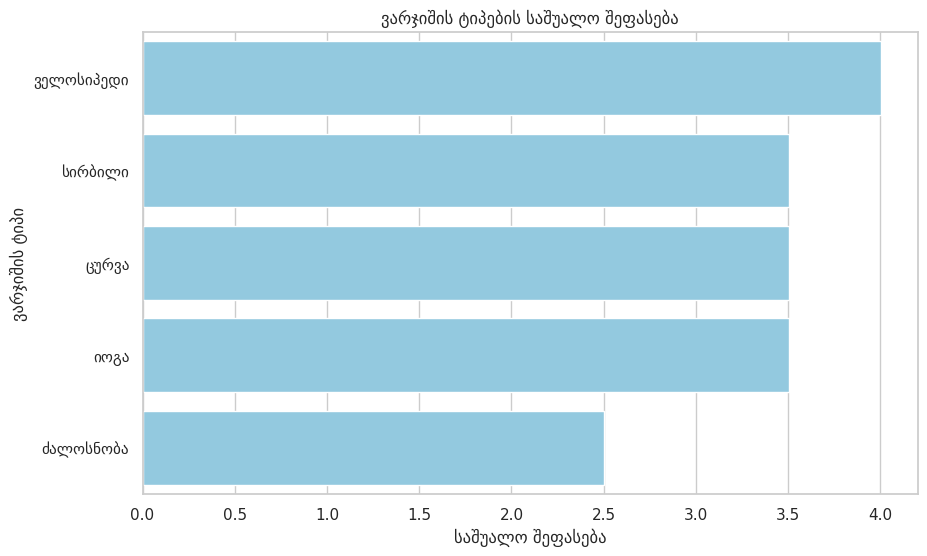

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Average_Rating', y='ვარჯიშის ტიპი', data=workout_ratings, color='skyblue')  # შეიტანეთ თქვენი სურსათის ფერი

plt.title('ვარჯიშის ტიპების საშუალო შეფასება')
plt.xlabel('საშუალო შეფასება')
plt.ylabel('ვარჯიშის ტიპი')

plt.show()


**დაკვირვებები:**


*   ყველაზე მაღალი შეფასება აქვს **ველოსიპებდს** - 4
*   ყველაზე დაბალი შეფასება აქვს **ძალოსნობას** - 2.4


**შეხედულებები:**

* ძალოსნობის შეფასებები ყველაზე დაბალია და შესაბამისად მეტი ყურადღება
ჭირდებათ. გამოსაკვლევია, რატომ აქვს ამ ვარჯიშს ყველაზე ნაკლები შეფასება, რადგან ეს შესაძლოა მოქმედი ფაქტორი იყოს იმაზზე,რომ ძალოსნობაზე ყველაზე ნაკლებ ადამიანს აქვს დახარჯული დრო. მიზეზის გამოკვლევის შემდეგ შესაძლებელი იქნება მეტი მუშაობა მომხმარებლების შეფასების ამაღზლებაზც.

* თუ მომხმარებელს არ აქვს განსაზღრული ვარჯიშის ტიპი, რომლითაც დაინტერესებულია აპლიკაციამ შესაძლოა შესთავაზოს ველოსიპედით ვარჯიში, რადგან დიდი შანსია, რომ მომხმარებელს ეს ვარჯიშ მოეწონება.

# ვარჯიშის ხანგრძლივობისა და კალორიების წვის კორელაცია

In [ ]:
correlation = df['ხანგრძლივობა'].corr(df['დამწვარი კალორიები'])

print(f"კორელაცია ხანგრძლივობასა და დამწვარ კალორიებს შორის: {correlation:.2f}")

კორელაცია ხანგრძლივობასა და დამწვარ კალორიებს შორის: 0.86


**ანალიზი**

კორელაციის კოეფიციენტი 0.86 ნიშნავს, რომ არსებობს ძლიერი დადებითი ურთიერთობა ხანგრძლივობასა და დამწვარი კალორიების რაოდენობას შორის. ეს მიუთითებს იმაზე, რომ როგორც ვარჯიშის ხანგრძლივობა იზრდება, ასევე იზრდება დამწვარი კალორიების რაოდენობაც. ამასთან, ეს აჩვენებს, რომ მომხმარებლები, რომლებიც უფრო მეტ ხანს ვარჯიშობენ, საშუალოდ უფრო მეტ კალორიას ანთავისუფლებენ.

**სტრატეგია**

 ყურადღება უნდა გავამახვილოთ იმაზე, რომ მომხმარებლებს ვარჯიშის ხანგრძლივობა გავზარდოთ. მაგავილათ შესაძლოა პროგრამების შემუშავება, რომლებიც მომხმარებლებს მოტივაციას მისცემენ, რომ მიაღწიონ მიზნებს ხანგრძლივობის მიხედვით.

# ყოველთვიური ჩართულობის ტენდენციები

In [ ]:
# თარიღის სვეტი datetime ფორმატზე გადაყვანა
df['თარიღი'] = pd.to_datetime(df['თარიღი'])

# თარიღის თვედ გარდაქმნა
df['თვე'] = df['თარიღი'].dt.to_period('M')

# ჩართულობის ყოველთვიური გაანგარიშება
monthly_engagement = df.groupby('თვე').agg(
    Sessions=('მომხმარებლის ID', 'count'),
    Average_Duration=('ხანგრძლივობა', 'mean'),
    Average_Calories=('დამწვარი კალორიები', 'mean')
).reset_index()

# სვეტების სახელების შეცვლა
monthly_engagement.columns = ['თვე', 'სესიები', 'საშუალო ხანგრძლივობა', 'საშუალო კალორიები']

# დალაგება კლებადობით
monthly_engagement = monthly_engagement.sort_values(by='სესიები', ascending=False)

print(monthly_engagement)

# საუკეთესო და ყველაზე ცუდი თვეები
best_month = monthly_engagement['თვე'].iloc[0]
worst_month = monthly_engagement['თვე'].iloc[-1]

print(f"\nსაუკეთესო თვე: {best_month}")
print(f"ყველაზე ცუდი თვე: {worst_month}")


        თვე  სესიები  საშუალო ხანგრძლივობა  საშუალო კალორიები
0   2023-01    42562             43.636475         254.700382
4   2023-05    42554             43.475953         254.345377
9   2023-10    42552             43.443936         253.868628
2   2023-03    42470             43.435890         253.659509
6   2023-07    42421             43.389336         253.156022
8   2023-09    41361             43.527582         254.030062
10  2023-11    41134             43.570786         254.487311
5   2023-06    40948             43.572326         254.867099
3   2023-04    40839             43.505032         254.122083
7   2023-08    39607             43.471028         253.754549
1   2023-02    38347             43.541480         254.459107
11  2023-12    22686             43.558701         254.089520

საუკეთესო თვე: 2023-01
ყველაზე ცუდი თვე: 2023-12


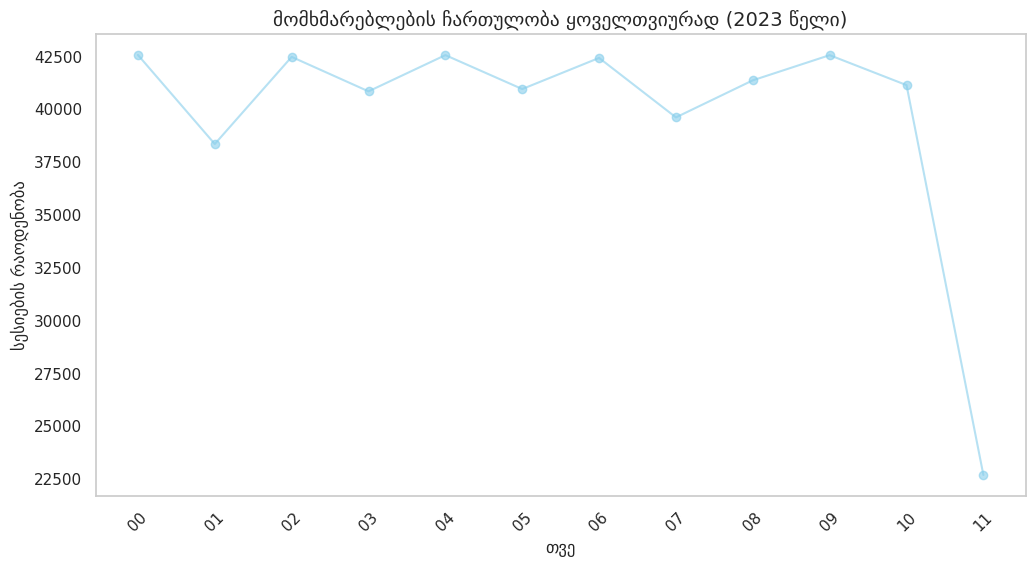

In [ ]:
import matplotlib.pyplot as plt

# თვეთა და სესიები ავტომატურად ვიღებთ DataFrame-დან
monthly_engagement.sort_index(inplace=True)  # დარწმუნდით, რომ თვეები სწორად არის დალაგებული
months = monthly_engagement.index.astype(str).tolist()  # თვეები
months = [month.replace('2023-', '') for month in months]  # წელიწადი ამოვიღოთ
months = [f'{int(month):02}' for month in months]  # თვეები 01, 02 ფორმატში

sessions = monthly_engagement['სესიები'].tolist()  # სესიების რაოდენობა

plt.figure(figsize=(12, 6))
plt.plot(months, sessions, marker='o', linestyle='-', color='skyblue', alpha=0.6)
plt.xlabel('თვე', fontsize=12)
plt.ylabel('სესიების რაოდენობა', fontsize=12)
plt.title('მომხმარებლების ჩართულობა ყოველთვიურად (2023 წელი)', fontsize=14)
plt.xticks(rotation=45)
plt.grid()

plt.show()


**დაკვირვებები:**

* ჩართულობა პიკს აღწევს იანვრის თვეში
* მნიშვნელოვანი კლება აღინიშნება დეკემბრის თვეს

**შეხედულება**

* წლის დასაწყისში პიკი შესაძლოა იყოს გამოწვეული იმით, რომ წლის დასაწყისში ბევრი ადამიანი მეტად ცდილობს მიყვეს ჯანსაღი ცხოვრების წესს. ამ დროს მეტადაც ისახავენ მიზნებს, რომ უკეთეს ფორმაში ჩადგნენ.

* წლის ბოლო თვეს კლება შესაძლოა გამოწვეული იყოს იმიტი, რომ საახალწლო პერიოდი ახლოვდება. ამ დროისთვის ზოგი ადამიანი ანებებს თავს ვარჯიშს და ზოგი დაკავებულია საახალწლო სეზონის გამო.

**სტრატეგია:**

* ვფიქრობ კარგი იქნება თუ დროთა განმალობაშ მომხმარებლებს გაეგზავნებათ გამამხმნევებელი მესიჯები. ასევე, შესაძლოა აპლიკაციაშ იყოს ფუნქცია, რომელიც მომხმარებელს მისცემს საშუალებას წლიური გეგმა დაისახოს, დაინახოს პროგრესული bar თუ რამდენი დარჩა მიზნის მისაღწევად და გაახსენოს, რომ გარკვეული გზა უკვე განვლო სასურველი შედეგის მისაღწევად და არ უნდა დანებდეს.

# მომხმარებელთა თანმიმდევრულობის ანალიზი

In [ ]:
user_frequency = df.groupby('მომხმარებლის ID')['თარიღი'].count()
frequency_stats = user_frequency.describe()
frequency_quantiles = user_frequency.quantile([0.25, 0.5, 0.75])

print("ვარჯიშის სიხშირის სტატისტიკა:")
print(frequency_stats)
print("\nვარჯიშის სიხშირის კვანტილები:")
print(frequency_quantiles)

ვარჯიშის სიხშირის სტატისტიკა:
count    10000.000000
mean        47.748100
std         15.785087
min         12.000000
25%         36.000000
50%         45.000000
75%         57.000000
max        127.000000
Name: თარიღი, dtype: float64

ვარჯიშის სიხშირის კვანტილები:
0.25    36.0
0.50    45.0
0.75    57.0
Name: თარიღი, dtype: float64


**ანალიზი**

1. მომხმარებელთა ჩართულობის საშუალო სიხშირე არის 47.75 ვარჯიში წელიწადში, ხოლო სტანდარტული გადახრა - 15.79.
აქედან გამომდინარე:
* საშუალოდ, მომხმარებლები ვარჯიშობენ დაახლოებით წელიწადში 47-ჯერ.
* სტანდარტული გადახრა გვიჩვენებს, რომ არსებობს საკმაოდ დიდი "გაბნევა" - მომხმარებლებს შორის - ზოგი უფრო ხშირად ვარჯიშობს (საშუალოდ 62 ვარჯიშამდე წელიწადში), ზოგი კი - უფრო იშვიათად (საშუალოდ მხოლოდ 32-ჯერ წელიწადში).

2. მომხმარებლების 25% ვარჯიშობს 36-ჯერ ან ნაკლებად წელიწადში, ხოლო 75% ვარჯიშობს 57-ჯერ ან ნაკლებად წელიწადში.

3. მედიანა (50% კვანტილი):
მომხმარებლების ნახევარი ვარჯიშობს 45-ჯერ ან ნაკლებად წელიწადში.

**რეკომენდაციები**

* განსაკუთრებული ყურადღება უნდა მიექცეს ნაკლებად აქტიურ მომხმარებლებს. შესაძლოა მომზადდეს სპეციალური პროგრამები და რეკომენდაციები, რომლებიც მათ რეგულარული ვარჯიშის ჩვევის ჩამოყალიბებაში დაეხმარებათ.

* შესაძლოა შემუშავდეს პერსონალიზებული შეთავაზებები, რომელიც შესთავაზებს მომხმარებლებს ინდივიდუალურ ვარჯიშის გეგმას, რომელიც მათ საჭიროებებსა და მიზნებს მაქსიმალურად შეესაბამება.


# რეკომენდაციები

1. **მომხმარებელთა ჩართულობის გაუმჯობესება**:

     * შემოიღეთ გეიმიფიკაციის ელემენტები (ყოველდღიური გამოწვევები, ჯილდოები)
     * დაამატეთ სოციალური ფუნქციები (მეგობრებთან შედარება, ჯგუფური გამოწვევები)
     * შექმენით პერსონალიზებული მიზნები ვარჯიშის სიხშირის გასაზრდელად

2. **ვარჯიშის ტიპების ოპტიმიზაცია**:
   - მონაცემები აჩვენებს დიდ განსხვავებას ვარჯიშის ტიპების პოპულარობაში (სირბილი: 167,259 vs ძალოსნობა: 47,881 სესია)

     * შექმენით კომბინირებული ვარჯიშის პროგრამები (მაგ., სირბილი + ძალოსნობა)
     * დაამატეთ დეტალური ვიდეო ინსტრუქციები ნაკლებად პოპულარული ვარჯიშებისთვის
     * შემოიღეთ მოკლე, 15-20 წუთიანი ვარჯიშის რუტინები დამწყებთათვის

3. **სეზონური მარკეტინგული სტრატეგიები**:
   - დეკემბერში აქტივობა მკვეთრად მცირდება (22,686 სესია vs საშუალო 42,000+)
   
     * შექმენით სპეციალური "შინ ვარჯიშის" პროგრამები ზამთრის თვეებისთვის
     * დანერგეთ push ნოტიფიკაციების ჭკვიანი სისტემა აქტივობის შესანარჩუნებლად
     * შემოიღეთ სეზონური გამოწვევები აქტივობის გასაზრდელად ნაკლებად აქტიურ პერიოდებში


## დასკვნა


**ზოგადი შედეგები და შესაძლებლობები**


FitTech-მა 2023 წელს აჩვენა სტაბილური შედეგები, საშუალოდ 42,000+ სესიით თვეში. სირბილი იყო ყველაზე პოპულარული აქტივობა (167,259 სესია), ხოლო აქტივობის პიკი დაფიქსირდა იანვარში (42,562 სესია). მთავარი შესაძლებლობები მდგომარეობს სეზონური ვარიაციების დაბალანსებასა და ნაკლებად პოპულარული აქტივობების გააქტიურებაში.

**მნიშვნელოვანი ფაქტები:**


1. ძლიერი კორელაცია (0.86) არსებობს ვარჯიშის ხანგრძლივობასა და დახარჯულ კალორიებს შორის
2. იოგა ლიდერობს საშუალო ხანგრძლივობით (67.51 წთ) და კალორიების ხარჯვით (337.54 კალ/სესია)
3. მომხმარებლები საშუალოდ თვეში 47.75 სესიას ატარებენ
4. დეკემბერში აქტივობა 46%-ით მცირდება სხვა თვეებთან შედარებით
5. ძალოსნობას აქვს ყველაზე დაბალი შეფასება (2.50) და ყველაზე ნაკლები სესიები (47,881)

**რეკომენდაციები და მათი გავლენა**


FitTech-ს შეუძლია გააუმჯობესოს:

- **მომხმარებელთა ჩართულობა**
  * გეიმიფიკაციის და სოციალური ელემენტების დამატებით
  * პერსონალიზებული მიზნების დასახვით
  * გავლენა: მომხმარებელთა შენარჩუნების მაჩვენებლის ზრდა

- **ვარჯიშის ტიპების მრავალფეროვნება**
  * კომბინირებული პროგრამების შექმნით
  * დეტალური ინსტრუქციების დამატებით
  * გავლენა: ახალი სეგმენტების მოზიდვა

- **სეზონური აქტივობა**
  * შინ ვარჯიშის პროგრამების დამატებით
  * სეზონური გამოწვევების შემოღებით
  * გავლენა: სტაბილური წლიური აქტივობა
  

**შეჯამება**

ეს ანალიზი ქმნის საფუძველს FitTech-ის სტრატეგიული განვითარებისთვის. მონაცემები აჩვენებს, რომ აპლიკაციას აქვს მყარი საფუძველი, მაგრამ არსებობს მნიშვნელოვანი ზრდის პოტენციალი სწორი ოპტიმიზაციის შემთხვევაში. განსაკუთრებით პერსპექტიულია სეზონური ვარიაციების დაბალანსება და ნაკლებად პოპულარული აქტივობების გაძლიერება, რაც შექმნის უფრო მრავალმხრივ და მომხმარებელზე მორგებულ პროდუქტს.